In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('playgolf_data.csv')
data1=data.copy() #safe side  cause we are converting the categorical data into 0 and 1 
data

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [4]:
data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
PlayGolf       0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#label_encoder={}
for col in data.columns:
    data[col]=le.fit_transform(data[col])
    data[col]=data[col].astype('category')

#we do the above method for encoding or the below method 

##encode tagrget
#target_encoder=LabelEncoder()
#data['PlayGolf']= target_encoder(data['PlayGolf'])
#data
#data.info()
print(data)
data.info()

   Outlook Temperature Humidity Wind PlayGolf
0        2           1        0    1        0
1        2           1        0    0        0
2        0           1        0    1        1
3        1           2        0    1        1
4        1           0        1    1        1
5        1           0        1    0        0
6        0           0        1    0        1
7        2           2        0    1        0
8        2           0        1    1        1
9        1           2        1    1        1
10       2           2        1    0        1
11       0           2        0    0        1
12       0           1        1    1        1
13       1           2        0    0        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Outlook      14 non-null     category
 1   Temperature  14 non-null     category
 2   Humidity     14 non-null     ca

In [6]:
#divide X and Y values
X=data.drop(['PlayGolf'],axis=1)
y=data['PlayGolf']

In [7]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape # We have given 11 from from each column for ttraining

(11, 4)

In [9]:
y_train.shape # we get only 1-d cause dependent value we have only one 

(11,)

In [10]:
X_test.shape# three rowa for testing from every four column

(3, 4)

In [11]:
y_test.shape #here we have three rows for testing and that are from dependent column

(3,)

In [12]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 0])

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy",accuracy_score(y_test,y_pred))
print("Classification report",classification_report(y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Accuracy 1.0
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion matrix: [[1 0]
 [0 2]]


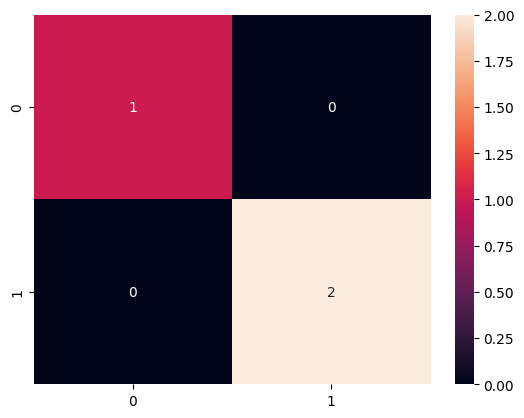

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

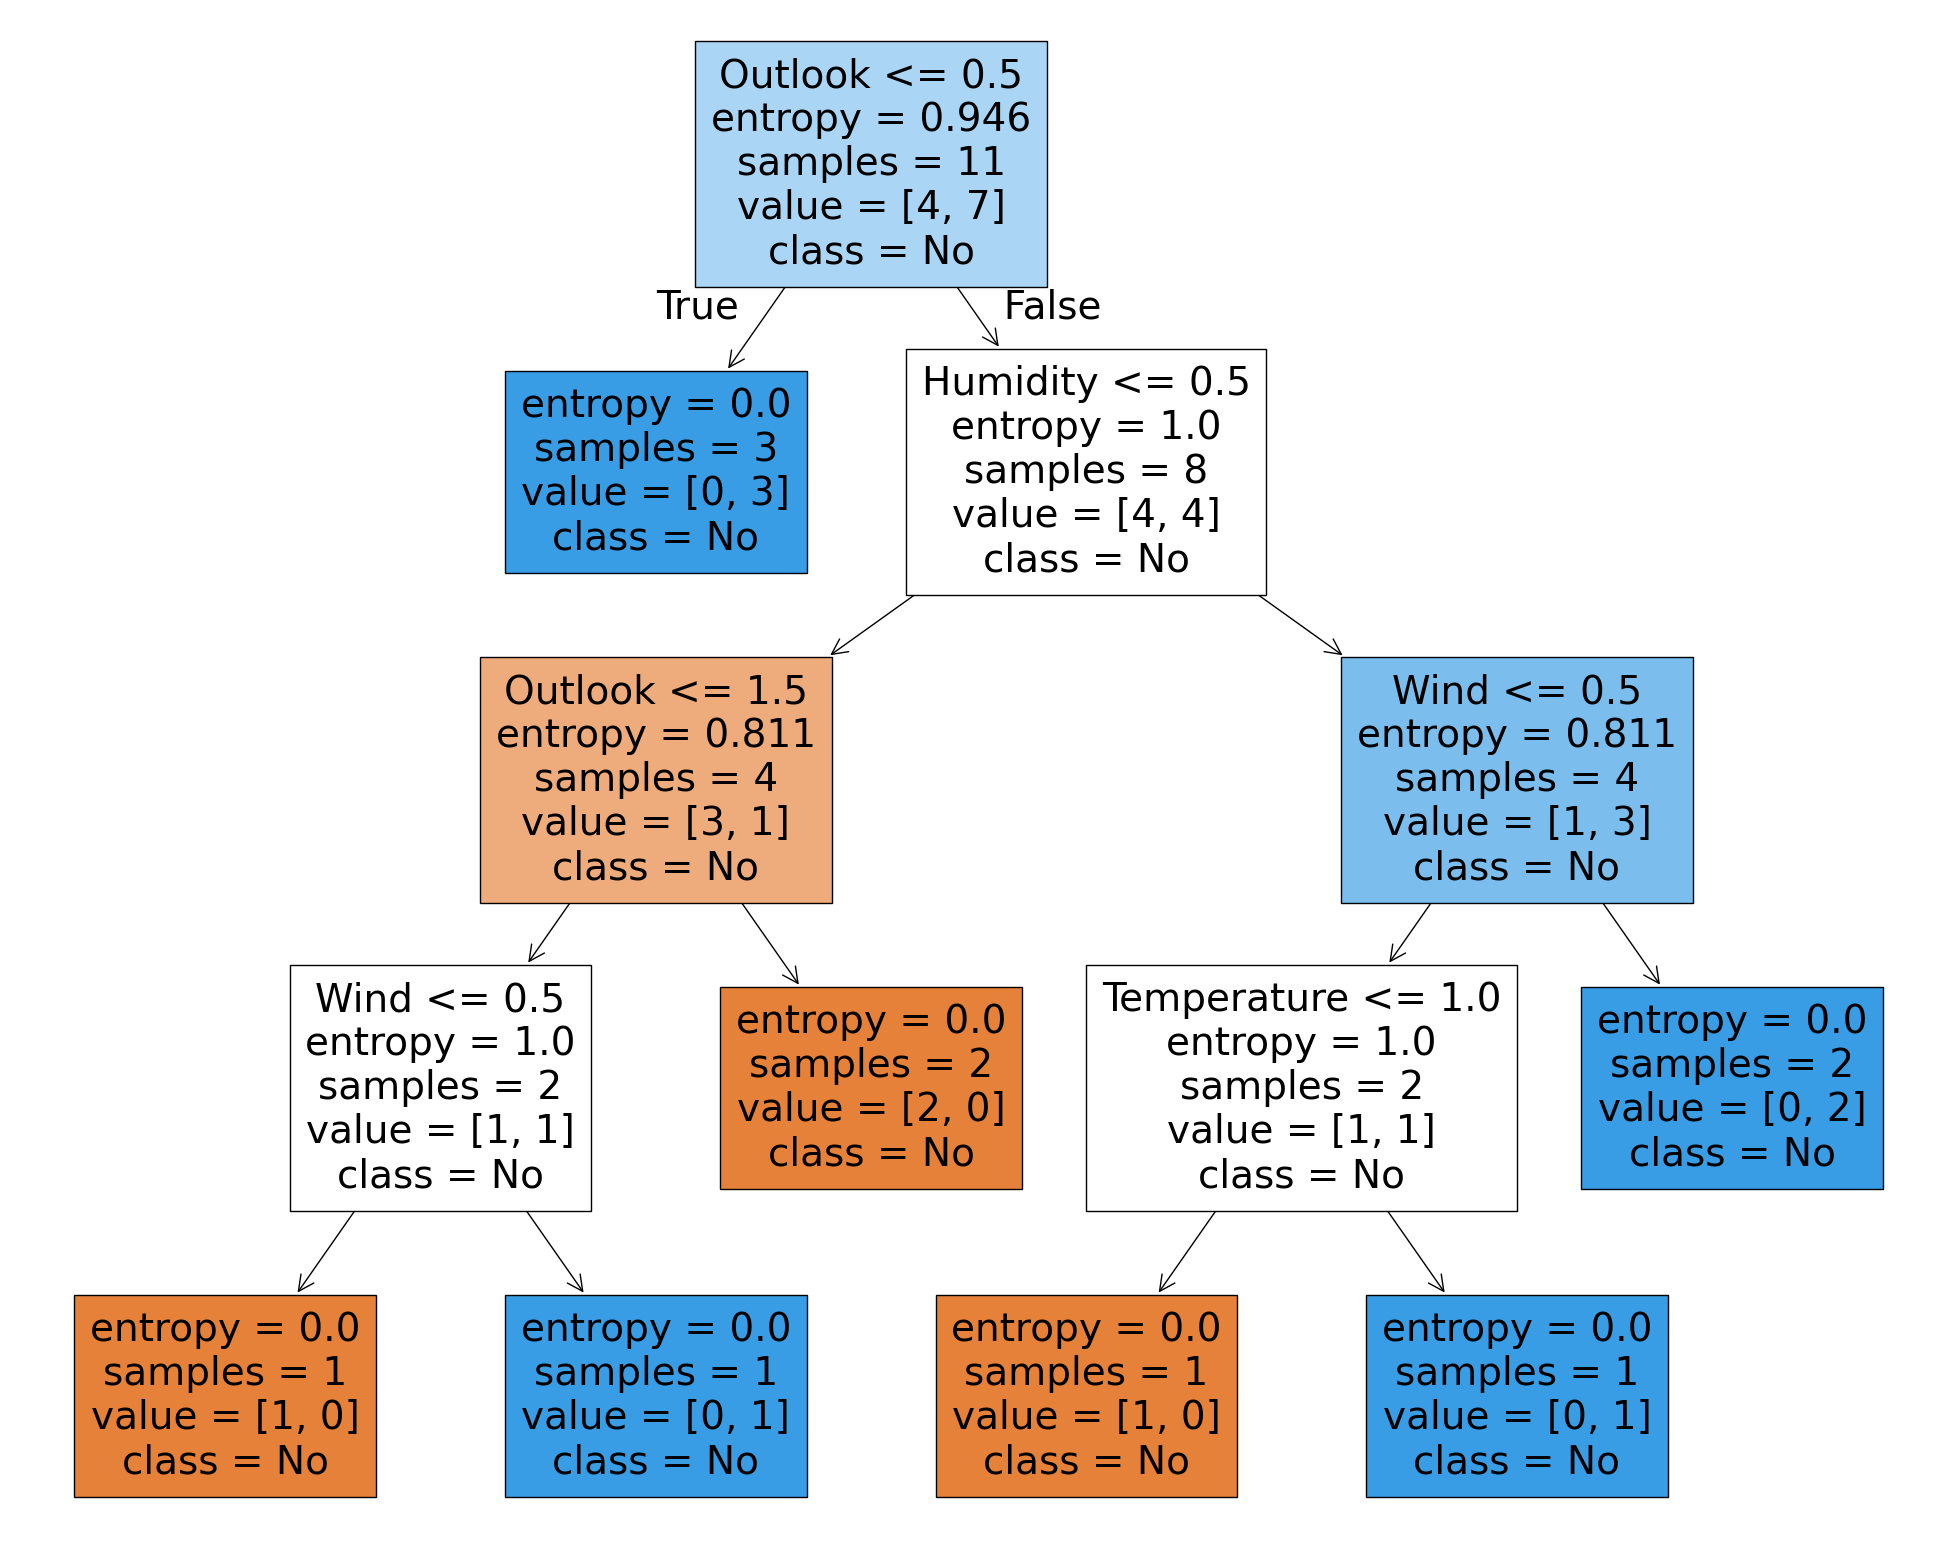

In [16]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(dt,feature_names=data1.columns,
                 class_names=data1['PlayGolf'],filled=True) #tree is amethod in sklearn to print the tree

In [17]:
import pickle
with open('decisiontreemodel.pkl','wb') as file:
    pickle.dump(dt,file)